4    52
5    39
3    35
1    31
6    20
2    17
Name: landmass, dtype: int64
               red  green      blue      gold     white     black    orange  \
landmass                                                                      
3         0.828571    0.2  0.514286  0.428571  0.771429  0.171429  0.057143   
6         0.800000    0.2  0.800000  0.600000  0.950000  0.150000  0.150000   

              bars   stripes   circles   crosses  saltires  quarters  \
landmass                                                               
3         0.628571  1.285714  0.028571  0.285714  0.028571  0.028571   
6         0.000000  0.400000  0.150000  0.400000  0.300000  0.400000   

          sunstars  triangle   animate  
landmass                                
3         0.142857  0.028571  0.114286  
6         3.300000  0.250000  0.300000  
red          int64
green        int64
blue         int64
gold         int64
white        int64
black        int64
orange       int64
mainhue     object
b

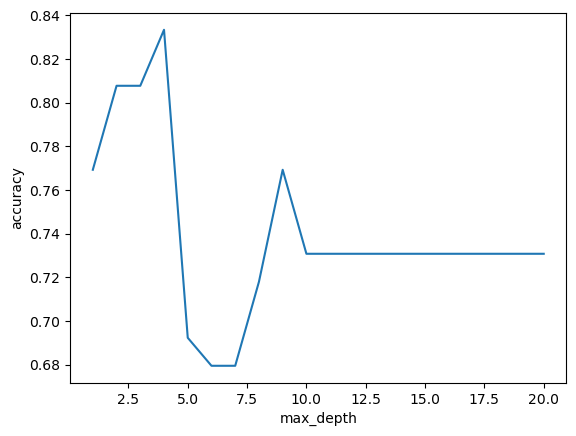

Best score: 0.8333333333333334, at max_depth: 4


<Figure size 640x480 with 0 Axes>

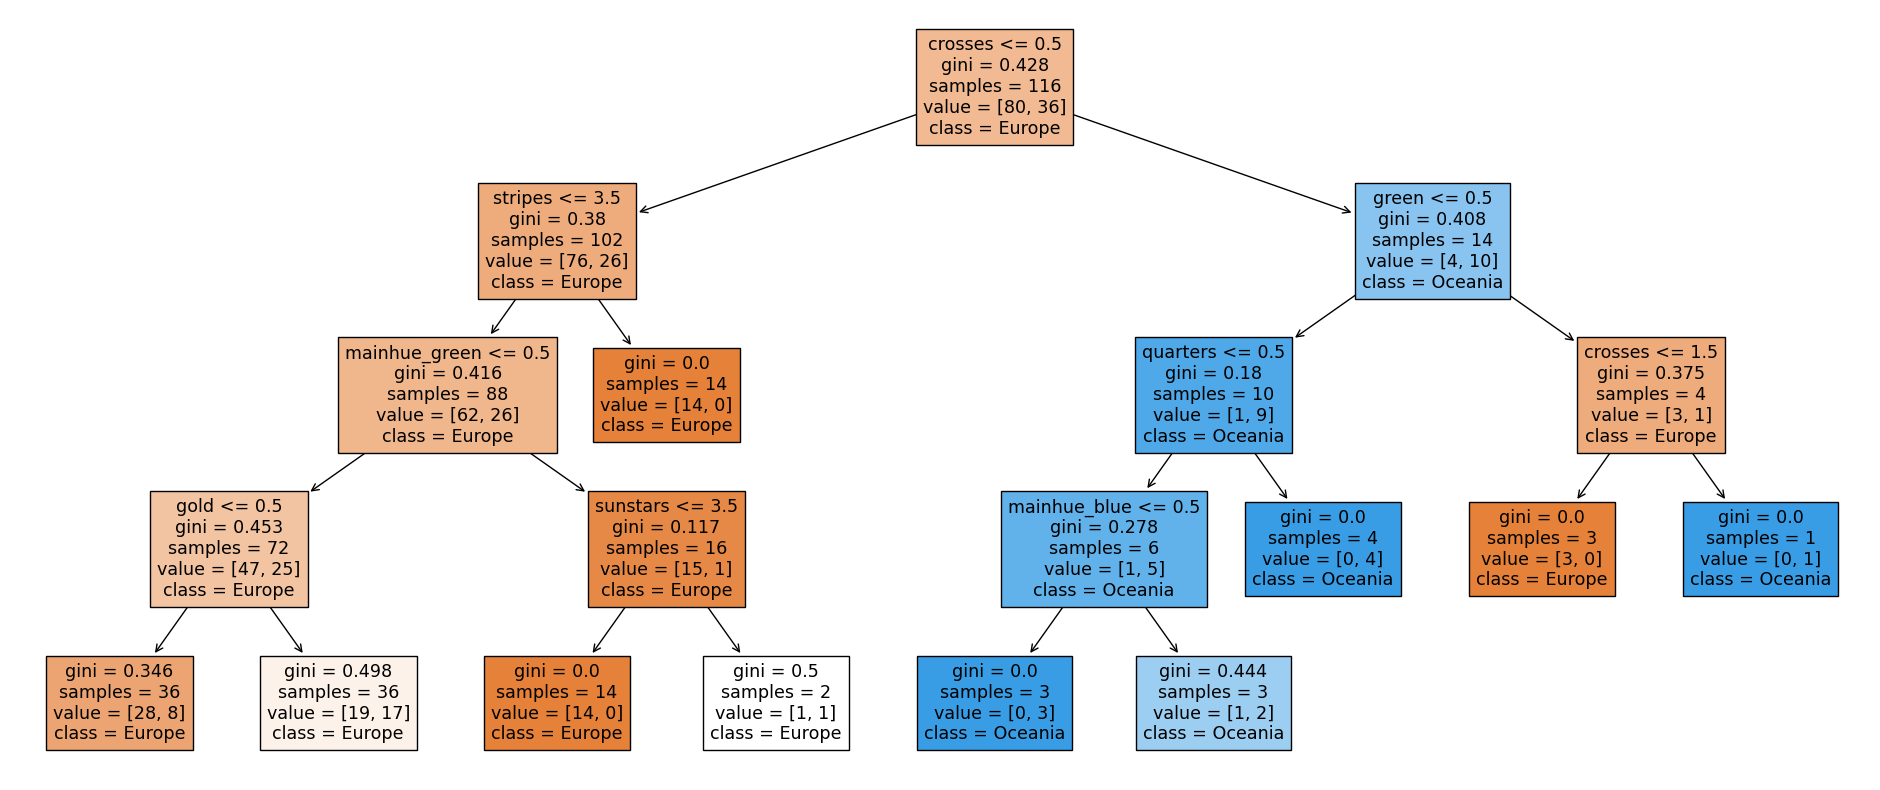

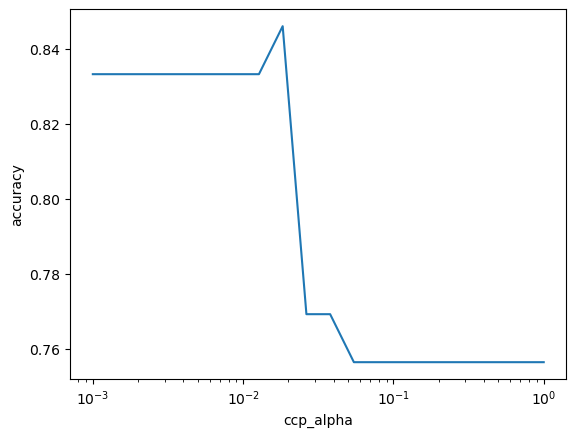

Best score: 0.8461538461538461, at ccp_alpha: 0.018329807108324356


<Figure size 640x480 with 0 Axes>

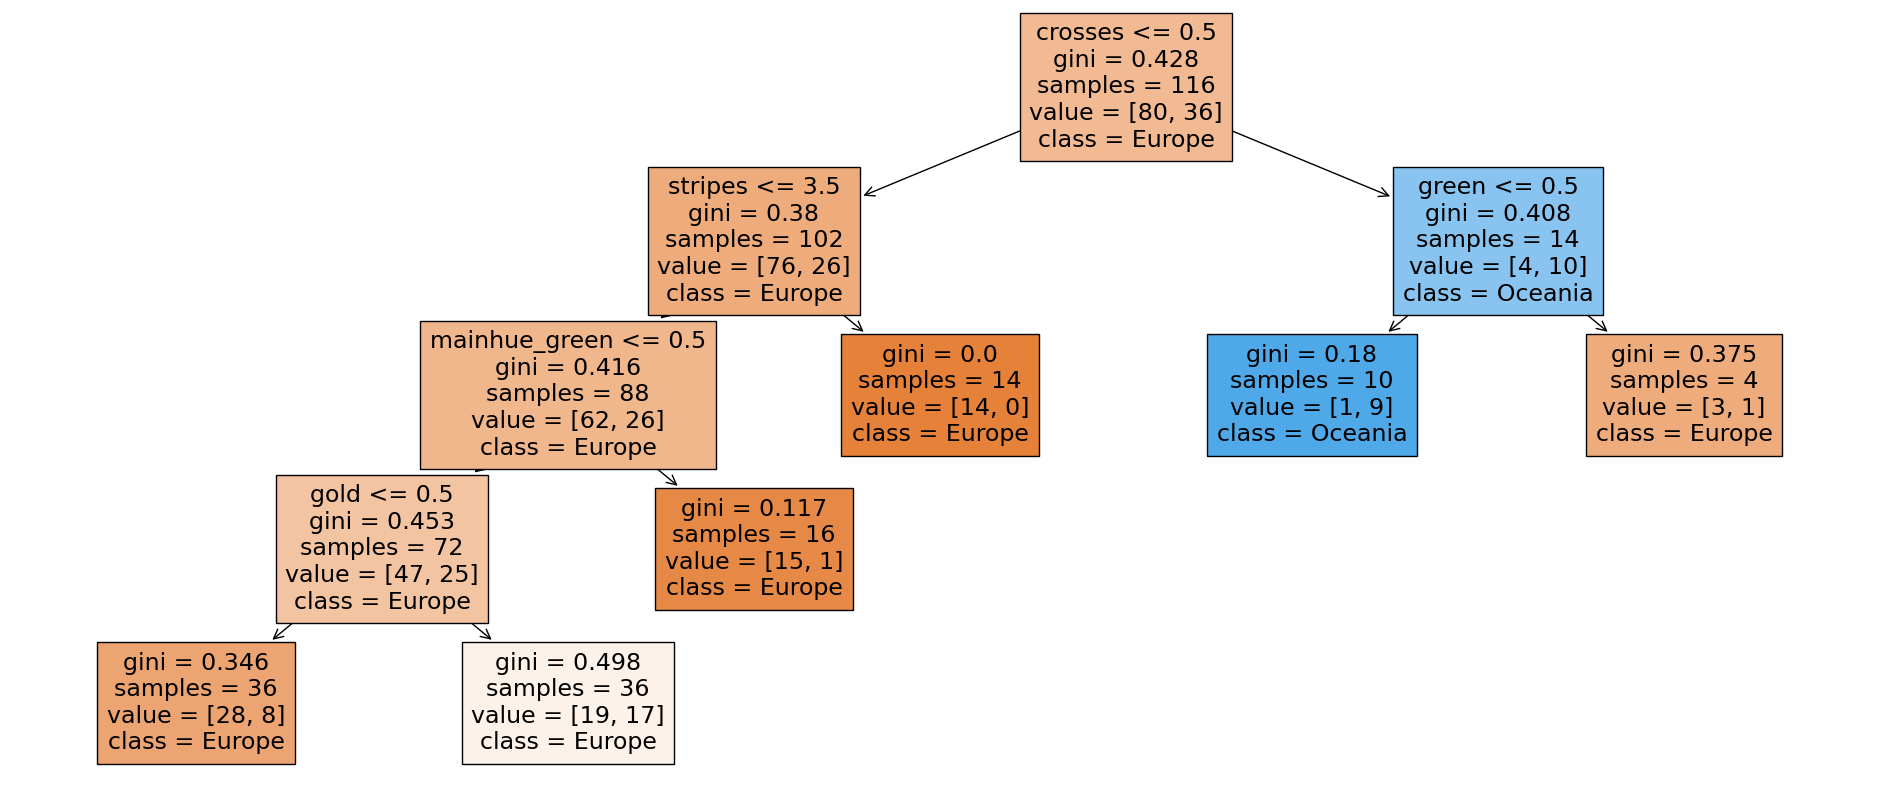

<Figure size 640x480 with 0 Axes>

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

#https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data
cols = ['name','landmass','zone', 'area', 'population', 'language','religion','bars','stripes','colours',
'red','green','blue','gold','white','black','orange','mainhue','circles',
'crosses','saltires','quarters','sunstars','crescent','triangle','icon','animate','text','topleft','botright']
df= pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data", names = cols)

#variable names to use as predictors
var = [ 'red', 'green', 'blue','gold', 'white', 'black', 'orange', 'mainhue','bars','stripes', 'circles','crosses', 'saltires','quarters','sunstars','triangle','animate']

#Print number of countries by landmass, or continent
print(df.landmass.value_counts())

#Create a new dataframe with only flags from Europe and Oceania
df_36 = df[df.landmass.isin([3, 6])]

#Print the average vales of the predictors for Europe and Oceania
print(df_36.groupby(df.landmass)[var].mean(numeric_only=True))

#Create labels for only Europe and Oceania
labels = (df.landmass.isin([3, 6])) * 1

#Print the variable types for the predictors
print(df_36[var].dtypes)

#Create dummy variables for categorical predictors
data = pd.get_dummies(df[var])

#Split data into a train and test set
x_train, x_test, y_train, y_test = train_test_split(data, labels, random_state=1, test_size=.4)

#Fit a decision tree for max_depth values 1-20; save the accuracy score in acc_depth
depths = range(1, 21)
acc_depth = []
for depth in depths:
  dtree = DecisionTreeClassifier(random_state=1, max_depth=depth)
  dtree.fit(x_train,  y_train)
  score = dtree.score(x_test, y_test)
  acc_depth.append(score)
  #print("max_depth: {}, score: {}".format(depth,score))

#Plot the accuracy vs depth
plt.plot(depths, acc_depth)
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.show()
plt.clf()

#Find the largest accuracy and the depth this occurs
best_score = np.max(acc_depth)
best_depth = depths[acc_depth.index(best_score)]
print("Best score: {}, at max_depth: {}".format(best_score, best_depth))


#Refit decision tree model with the highest accuracy and plot the decision tree

dtree = DecisionTreeClassifier(random_state=1, max_depth=best_depth)
dtree.fit(x_train,  y_train)
plt.figure(figsize=(24,10))
tree.plot_tree(dtree, feature_names = x_train.columns,  
               class_names = ['Europe', 'Oceania'],
                filled=True)
plt.show()
plt.clf()

#Create a new list for the accuracy values of a pruned decision tree.  Loop through
#the values of ccp and append the scores to the list
ccps = np.logspace(-3, 0, num=20)
acc_ccp = []
for ccp in ccps:
  dtree = DecisionTreeClassifier(random_state=1, max_depth=best_depth, ccp_alpha=ccp)
  dtree.fit(x_train,  y_train)
  score = dtree.score(x_test, y_test)
  acc_ccp.append(score)
  #print("ccp_alpha: {}, score: {}".format(ccp,score))

#Plot the accuracy vs ccp_alpha

plt.plot(ccps, acc_ccp)
plt.xscale('log')
plt.xlabel('ccp_alpha')
plt.ylabel('accuracy')
plt.show()
plt.clf()

#Find the largest accuracy and the ccp value this occurs
best_score = np.max(acc_ccp)
best_ccp = ccps[acc_ccp.index(best_score)]
print("Best score: {}, at ccp_alpha: {}".format(best_score, best_ccp))

#Fit a decision tree model with the values for max_depth and ccp_alpha found above
dtree = DecisionTreeClassifier(random_state=1, max_depth=best_depth, ccp_alpha=best_ccp)
dtree.fit(x_train,  y_train)

#Plot the final decision tree
plt.figure(figsize=(24,10))
tree.plot_tree(dtree, feature_names = x_train.columns,  
               class_names = ['Europe', 'Oceania'],
                filled=True)
plt.show()
plt.clf()